In [1]:
VERSION

v"1.8.0-DEV.71"

In [2]:
using Plots
using Zygote

In [3]:
meshgrid(x, y) = reim(complex.(x', y))

x = 1:4
y = 10(1:3)
X, Y = meshgrid(x, y)
display(X)
display(Y)

3×4 Matrix{Int64}:
 1  2  3  4
 1  2  3  4
 1  2  3  4

3×4 Matrix{Int64}:
 10  10  10  10
 20  20  20  20
 30  30  30  30

In [4]:
function plotvf!(x, y, f; scale=1, kwargs...)
    X, Y = meshgrid(x, y)
    u(x, y) = scale * f(x, y)[1]
    v(x, y) = scale * f(x, y)[2]
    U = u.(X, Y)
    V = v.(X, Y)
    X -= U/2
    Y -= V/2
    quiver!(vec(X), vec(Y); quiver = (vec(U), vec(V)), kwargs...)
end

plotvf(x, y, f; kwargs...) = (plot(); plotvf!(x, y, f; kwargs...))

plotvf (generic function with 1 method)

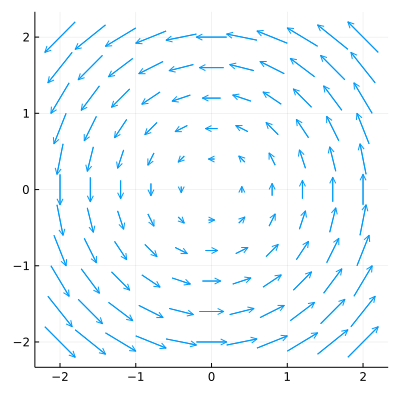

In [5]:
g(x, y) = (-y, x)
x = y = range(-2, 2, length=11)
plotvf(x, y, g; scale=0.2, size=(400, 400))

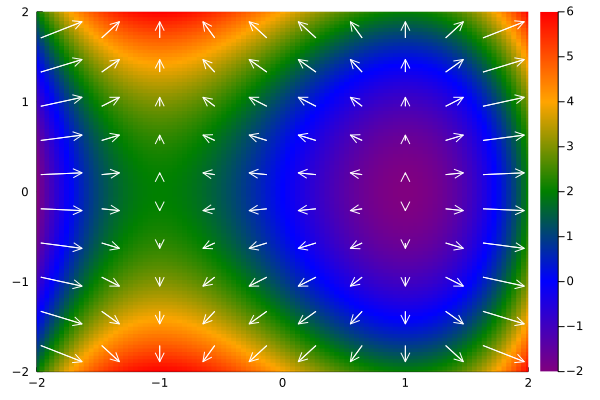

In [6]:
f(x, y) = x^3 - 3x + y^2
df(x, y) = gradient(f, x, y)
xs = ys = range(-2, 2, length=101)
heatmap(xs, ys, f; color=:rainbow)
x = y = range(-2, 2, length=21)[2:2:end]
plotvf!(x, y, df; scale=0.05, color=:white)
plot!(xlim=extrema(xs), ylim=extrema(ys))

For Plots.@recipe, see

* https://docs.juliaplots.org/latest/recipes/
* https://github.com/JuliaPlots/ExamplePlots.jl/blob/master/notebooks/usertype_recipes.ipynb
* https://github.com/JuliaPlots/ExamplePlots.jl/blob/master/notebooks/type_recipes.ipynb
* https://github.com/JuliaPlots/ExamplePlots.jl/blob/master/notebooks/series_recipes.ipynb
* https://github.com/JuliaPlots/Plots.jl/blob/master/src/recipes.jl
* https://nbviewer.jupyter.org/gist/genkuroki/521c4bf9160caae8f8c6591e78a9f1d1

In [7]:
module O

using Plots
meshgrid(x, y) = reim(complex.(x', y))

struct VectorField{X, Y, F, S} x::X; y::Y; f::F; scale::S end
VectorField(x, y, f; scale=0.2) = VectorField(x, y, f, scale)

@recipe function F(vf::VectorField)
    x, y, f, scale = vf.x, vf.y, vf.f, vf.scale
    X, Y = meshgrid(x, y)
    u(x, y) = scale * f(x, y)[1]
    v(x, y) = scale * f(x, y)[2]
    U = u.(X, Y)
    V = v.(X, Y)
    X -= U/2
    Y -= V/2
    
    seriestype := :quiver
    quiver --> (vec(U), vec(V))
    (vec(X), vec(Y))
end

end

Main.O

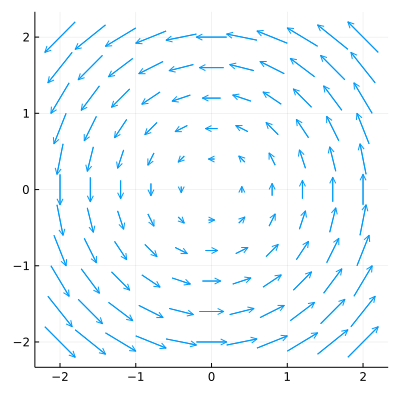

In [8]:
x = y = range(-2, 2, length=11)
g(x, y) = (-y, x)
plot(O.VectorField(x, y, g); size=(400, 400))

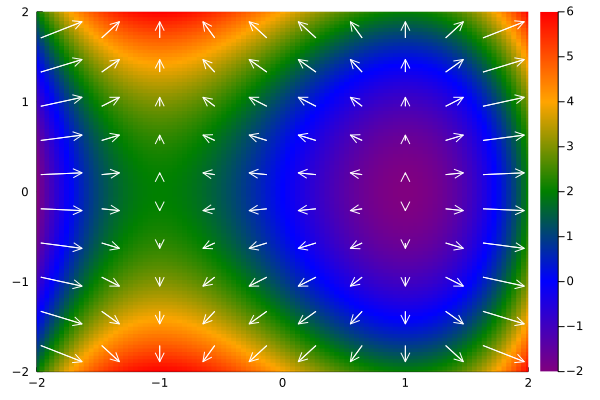

In [9]:
f(x, y) = x^3 - 3x + y^2
df(x, y) = gradient(f, x, y)
xs = ys = range(-2, 2, length=101)
heatmap(xs, ys, f; color=:rainbow)
x = y = range(-2, 2, length=21)[2:2:end]
plot!(O.VectorField(x, y, df, 0.05); color=:white)
plot!(xlim=extrema(xs), ylim=extrema(ys))